<a href="https://colab.research.google.com/github/YuvrajZende/Machine-Learning-Practice/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("iris.csv")

print(data.head(10))

print("\nlast data lines\n")

print(data.tail(10))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

last data lines

     sepal_length  sepal_width  petal_length  petal_width    species
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
14

In [ ]:
# Spliting the data
X = data.drop('species',axis=1) # 1 means column, 0 means row
y = data['species']

#Convert species name ti the numerical data

le = LabelEncoder()
Y = le.fit_transform(y)

#splitting the data

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Train Model
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

#predict
y_predict = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy:",accuracy)

Accuracy: 1.0


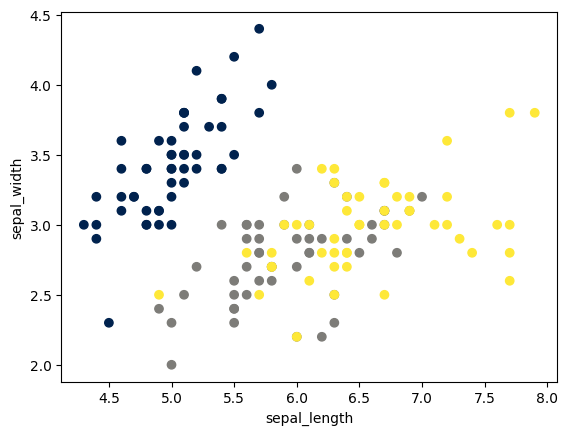

In [ ]:
from matplotlib import colors
plt.scatter(data["sepal_length"],data["sepal_width"],c=Y,cmap="cividis")
# plasma, magma, or cividis
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

In [ ]:
Student = pd.read_csv("student_scores.csv")
print(Student.head(10))
print("\n")
print(Student.tail(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


    Hours  Scores
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


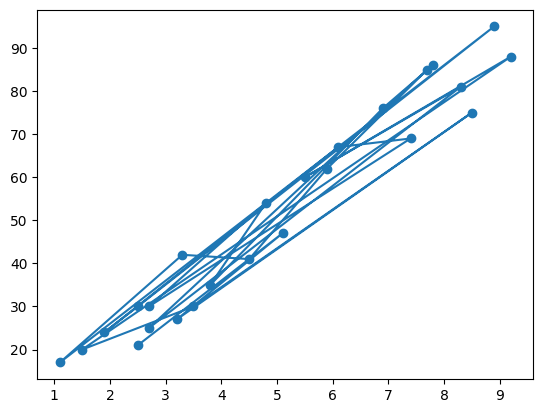

In [ ]:
X = Student[['Hours']]
Y = Student['Scores']

plt.scatter(X,Y)
plt.plot(X,Y)
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

print(model.score(X_test,y_test))

0.9678055545167994


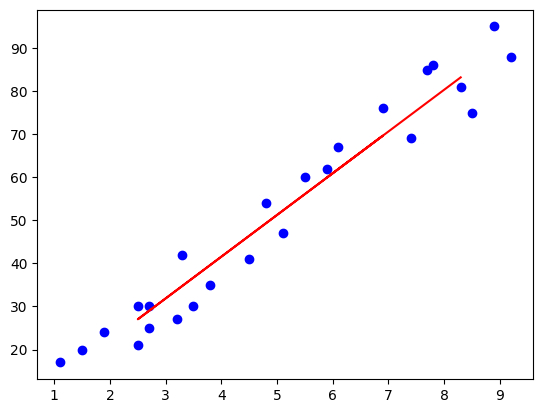

In [ ]:
plt.scatter(X,Y,color="blue")
plt.plot(X_test,y_predict,color="red")
plt.show()

In [ ]:
#Clustering {Unsupervised Learing}
from sklearn.cluster import KMeans

In [ ]:
Mall = pd.read_csv("Mall_Customers.csv")
print(Mall.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


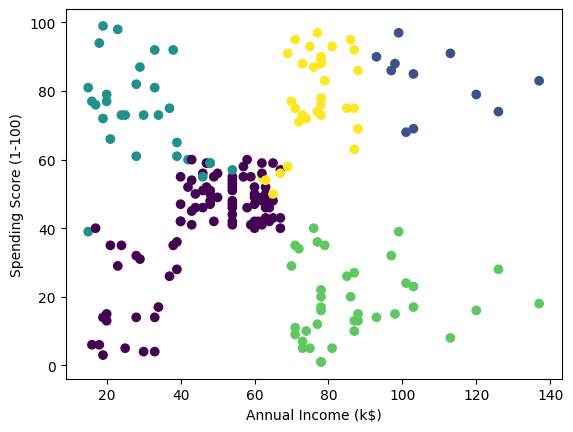

In [ ]:
x = Mall[["Annual Income (k$)","Spending Score (1-100)","Age"]]
kmeans = KMeans(n_clusters=5,random_state=42)
Mall["Cluster"] = kmeans.fit_predict(x)
#print(Mall.head(10))

plt.scatter(Mall["Annual Income (k$)"],Mall["Spending Score (1-100)"],c=Mall["Cluster"],cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()